In [2]:
import problem
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_train, y_train = problem.get_train_data('..')
X_train.loc[:, 'DateOfDeparture'] = pd.to_datetime(X_train.loc[:, 'DateOfDeparture'])
y_train = pd.DataFrame(y_train, columns=['Passengers'])

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateOfDeparture   8902 non-null   datetime64[ns]
 1   Departure         8902 non-null   object        
 2   Arrival           8902 non-null   object        
 3   WeeksToDeparture  8902 non-null   float64       
 4   std_wtd           8902 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 347.9+ KB


In [5]:
X_train.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,std_wtd
0,2012-06-19,ORD,DFW,12.875000,9.812647
1,2012-09-10,LAS,DEN,14.285714,9.466734
2,2012-10-05,DEN,LAX,10.863636,9.035883
3,2011-10-09,ATL,ORD,11.480000,7.990202
4,2012-02-21,DEN,SFO,11.450000,9.517159


In [6]:
X_train.describe()

,WeeksToDeparture,std_wtd
count,8902.000000,8902.000000
mean,11.446469,8.617773
std,2.787140,2.139604
min,2.625000,2.160247
25%,9.523810,7.089538
50%,11.300000,8.571116
75%,13.240000,10.140521
max,23.163265,15.862216


In [7]:
y_train.describe()

,Passengers
count,8902.000000
mean,10.999048
std,0.993945
min,3.878108
25%,10.427055
50%,11.013357
75%,11.592888
max,14.007791


In [8]:
Xy_train = X_train.copy()
Xy_train['Passengers'] = y_train

In [9]:
Xy_train.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,std_wtd,Passengers
0,2012-06-19,ORD,DFW,12.875000,9.812647,12.331296
1,2012-09-10,LAS,DEN,14.285714,9.466734,10.775182
2,2012-10-05,DEN,LAX,10.863636,9.035883,11.083177
3,2011-10-09,ATL,ORD,11.480000,7.990202,11.169268
4,2012-02-21,DEN,SFO,11.450000,9.517159,11.269364


In [10]:
print(Xy_train[Xy_train.Passengers == Xy_train.Passengers.min()]) 
print(Xy_train[Xy_train.Passengers == Xy_train.Passengers.max()]) 

     DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  Passengers
6486      2013-02-09       LGA     BOS               3.8  2.774887    3.878108
     DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  Passengers
1480      2012-10-11       LGA     ORD             14.48  11.44596   14.007791


In [11]:
def _encode_dates(X, drop=False):
    # With pandas < 1.0, we wil get a SettingWithCopyWarning
    # In our case, we will avoid this warning by triggering a copy
    # More information can be found at:
    # https://github.com/scikit-learn/scikit-learn/issues/16191
    X_encoded = X.copy()

    # Make sure that DateOfDeparture is of datetime format
    X_encoded.loc[:, 'DateOfDeparture'] = pd.to_datetime(X_encoded['DateOfDeparture'])
    # Encode the DateOfDeparture
    X_encoded.loc[:, 'year'] = X_encoded['DateOfDeparture'].dt.year
    X_encoded.loc[:, 'month'] = X_encoded['DateOfDeparture'].dt.month
    X_encoded.loc[:, 'day'] = X_encoded['DateOfDeparture'].dt.day
    X_encoded.loc[:, 'weekday'] = X_encoded['DateOfDeparture'].dt.weekday
    X_encoded.loc[:, 'week'] = X_encoded['DateOfDeparture'].dt.week
    X_encoded.loc[:, 'n_days'] = X_encoded['DateOfDeparture'].apply(
        lambda date: (date - pd.to_datetime("1970-01-01")).days
    )
    
    if drop:
        X_encoded.drop('DateOfDeparture', inplace=True, axis=1)
        
    return X_encoded
    
date_encoder = FunctionTransformer(_encode_dates)
Xy_train = date_encoder.fit_transform(Xy_train)

<ipython-input-11-231d6e4d65fe>:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  X_encoded.loc[:, 'week'] = X_encoded['DateOfDeparture'].dt.week


In [12]:
Xy_train.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,std_wtd,Passengers,year,month,day,weekday,week,n_days
0,2012-06-19,ORD,DFW,12.875000,9.812647,12.331296,2012,6,19,1,25,15510
1,2012-09-10,LAS,DEN,14.285714,9.466734,10.775182,2012,9,10,0,37,15593
2,2012-10-05,DEN,LAX,10.863636,9.035883,11.083177,2012,10,5,4,40,15618
3,2011-10-09,ATL,ORD,11.480000,7.990202,11.169268,2011,10,9,6,40,15256
4,2012-02-21,DEN,SFO,11.450000,9.517159,11.269364,2012,2,21,1,8,15391


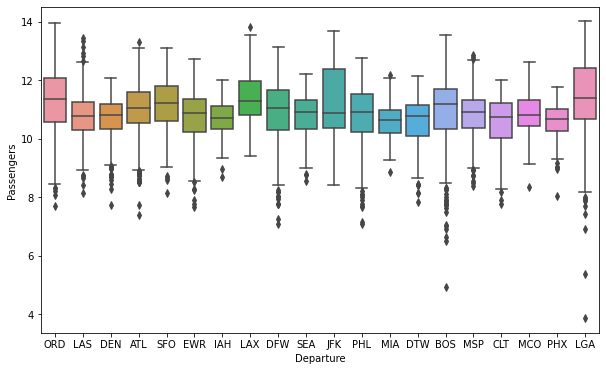

In [13]:
#box plot overallqual/saleprice
var = 'Departure'
data = pd.concat([Xy_train['Passengers'], Xy_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="Passengers", data=Xy_train)

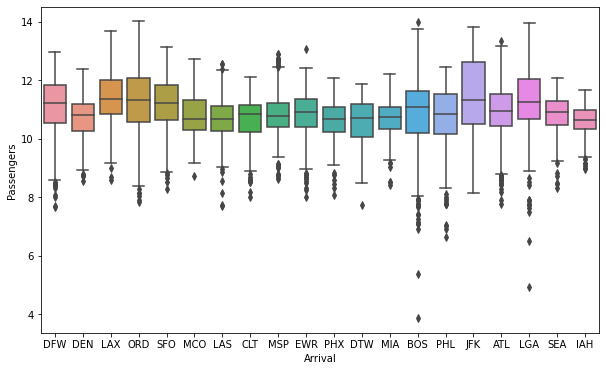

In [14]:
#box plot overallqual/saleprice
var = 'Arrival'
data = pd.concat([Xy_train['Passengers'], Xy_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="Passengers", data=Xy_train)

<AxesSubplot:>

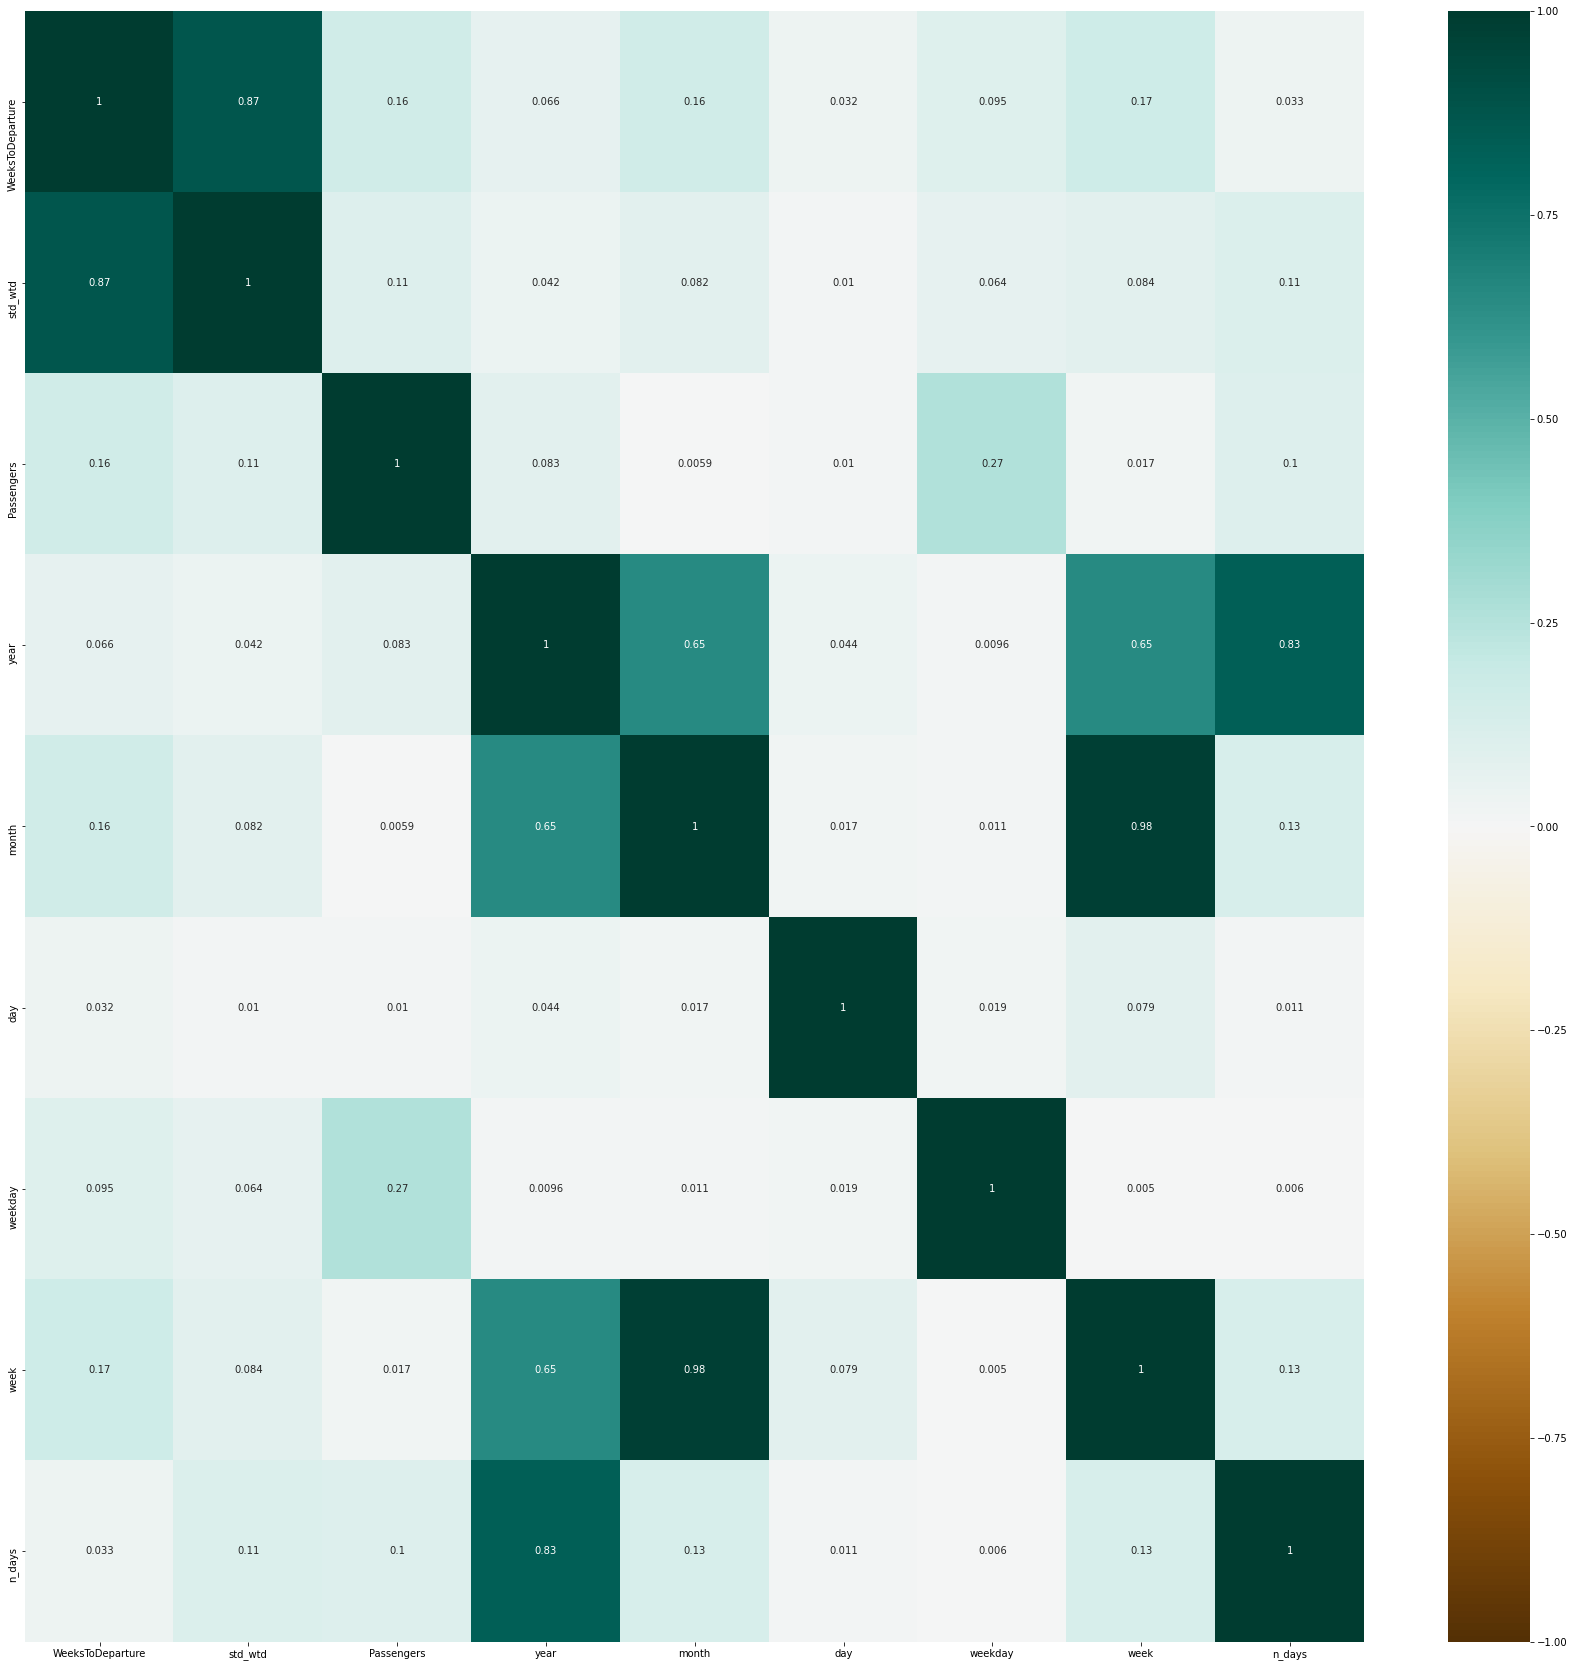

In [15]:
plt.figure(figsize=(30, 30))
sns.heatmap(abs(Xy_train.corr()), cmap='BrBG', annot=True, vmin=-1, vmax=1)

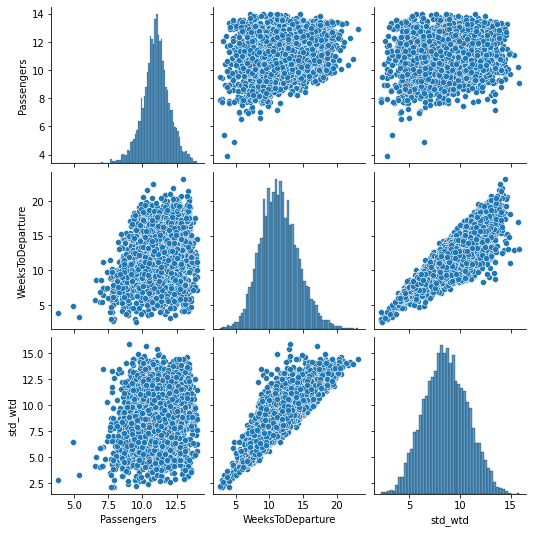

In [16]:
sns.pairplot(Xy_train[['Passengers', 'WeeksToDeparture', 'std_wtd']])

In [17]:
X_train, y_train = problem.get_train_data('..')
X_train.loc[:, 'DateOfDeparture'] = pd.to_datetime(X_train.loc[:, 'DateOfDeparture'])
y_train = pd.DataFrame(y_train, columns=['Passengers'])
Xy_train = X_train.copy()
Xy_train['Passengers'] = y_train
date_encoder = FunctionTransformer(_encode_dates)
Xy_train = date_encoder.fit_transform(Xy_train)

<ipython-input-11-231d6e4d65fe>:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  X_encoded.loc[:, 'week'] = X_encoded['DateOfDeparture'].dt.week


In [18]:
minneapolis = Xy_train.loc[Xy_train['Arrival'] == 'MSP'][Xy_train['Departure'] == 'ATL']
# miami = Xy_train.loc[Xy_train['Arrival'] == 'MIA']
# orlando = Xy_train.loc[Xy_train['Arrival'] == 'MCO']
# las_vegas = Xy_train.loc[Xy_train['Arrival'] == 'LAS']

<ipython-input-18-ea4b8e69a966>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minneapolis = Xy_train.loc[Xy_train['Arrival'] == 'MSP'][Xy_train['Departure'] == 'ATL']


In [19]:
minneapolis.describe()

,WeeksToDeparture,std_wtd,Passengers,year,month,day,weekday,week,n_days
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,10.709718,8.173225,10.662711,2011.855263,6.947368,14.315789,2.947368,27.486842,15481.460526
std,1.638576,1.385793,0.539684,0.508696,3.850177,8.859211,2.071359,16.621667,150.473248
min,7.058824,4.955686,8.625462,2011.000000,1.000000,1.000000,0.000000,1.000000,15219.000000
25%,9.806579,7.346499,10.512064,2012.000000,3.000000,7.000000,1.000000,11.000000,15362.000000
50%,10.533550,8.200795,10.769399,2012.000000,8.000000,13.500000,3.000000,31.000000,15461.000000
75%,11.758152,9.023500,11.018431,2012.000000,10.250000,22.000000,5.000000,43.000000,15603.250000
max,16.185185,11.842028,11.525581,2013.000000,12.000000,31.000000,6.000000,51.000000,15753.000000


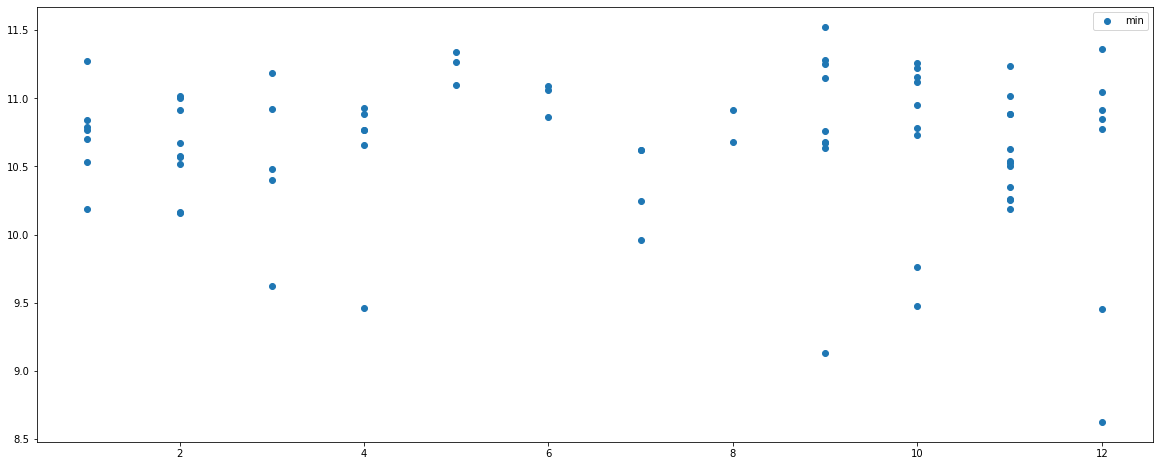

In [21]:
plt.figure(figsize=(20,8))
# plt.scatter(Xy_train['DateOfDeparture'], Xy_train['Passengers'], label='all')
plt.scatter(minneapolis['month'], minneapolis['Passengers'], label='min')
# plt.scatter(minneapolis[['week', 'year']], minneapolis['Passengers'], label='min')
# plt.scatter(minneapolis['week'], minneapolis['Passengers'], label='min')
# plt.scatter(miami['week'], miami['Passengers'], label='miami')
# plt.scatter(orlando['week'], orlando['Passengers'], label='orlando')
# plt.scatter(las_vegas['weekday'], las_vegas['Passengers'], label='orlando')

plt.legend()
plt.show()